# Промышленность — задача проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# План работ

```
Главная цель данного проекта - это создание модели металлургическому комбинату ООО «Так закаляем сталь», которая поможет оптимизировать производственные расходы за счет уменьшения электроэнергии на этапе обработки стали. С рабочей моделью, комбинат сможет заранее предсказывать температуру стали и избежать излишних затрат на не эффективных действия. 

Для достижения данной цели необходимы следующие этапы:
    Пред-подготовка данных - в себя включает:
        Исправление названий столбцов.
        Создание библиотеки данных.
        
    Исследование "голых" - в себя включает:
        Построение графиков для анализа данных.
        Поиск нужных и ненужных данных для обучения модели.
        
    Исследование с доработкой - в себя включает:
        Поиск возможных вариантов создания новых признаков для более эффективного обучения модели.
        Анализ данных полученных в результате вычислений 
        
    Подготовка данных - в себя включает:
        Проверка данных на аномалии и последовательное их удаление.
        Проверка данных на дубликаты и последовательное их удаление.
        Проверка данных на пропуски и принятие решение об удалении или заполнении строк с пропусками.
        Создание единой таблицы с данными.
        Разделение данных на тестовую и тренировочную выборку.
        Нормализация данных.
        
    Обучение модели - в себя включает:
        Обучение различных моделей.
        Подбор гиперпараметров. 
        Анализ важности признаков.
        Формирование единой таблицы результатов.
        Рассмотрение результатов моделей для отбора наиболее эффективной.
        Сравнение результата с дефолтной моделью.
        
    Вывод - в себя включает:
        Рассмотрение всей работы для вынесения цельного вывода по проведенной работе.
```

<font color='purpel'><b>Комментарий тимлида </b></font><br>
<font color='green'> ✔️ Хорошо, что есть цель проекта и его описание. Отличный план!</font>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np 

import re



In [2]:
RANDOM_STATE = 110423
TEST_SIZE = 0.25
PATH = "/datasets/final_steel/"

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Пред-подготовка данных

In [4]:
data_info = {
             "data_ark" : "данные об электродах",
             "data_bulk" : "данные о подаче сыпучих материалов (объём)",
             "data_bulk_time" : "данные о подаче сыпучих материалов (время)",
             "data_gas" : "данные о продувке сплава газом",
             "data_temp" : "результаты измерения температуры",
             "data_wire" : "анные о проволочных материалах (объём)",
             "data_wire_time" : "данные о проволочных материалах (время)"
            }

In [5]:
def cyrillic_to_latin(text):
    
    text = ''.join([i for i in text if not i.isdigit()])
    
    symbols = (u"абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ ",
    (*list(u'abvgdee'), 'zh', *list(u'zijklmnoprstuf'), 'kh', 'z', 'ch', 'sh', 'sh', '',
    'y', '', 'e', 'yu','ya', *list(u'ABVGDEE'), 'ZH', 
    *list(u'ZIJKLMNOPRSTUF'), 'KH', 'Z', 'CH', 'SH', 'SH', *list(u'_Y_E'), 'YU', 'YA', ' '))

    coding_dict = {source: dest for source, dest in zip(*symbols)}
    translate = lambda x: ''.join([coding_dict[i] for i in x])
    
    return translate(text)

In [6]:
def column_name_to_standart(data):
    
    for name in data.columns:
        if bool(re.search('[а-яА-Я]', name)):
            data = data.rename(columns = {name:cyrillic_to_latin(name)})
          
    data.columns = data.columns.str.lower()
    
    data.columns = data.columns.str.replace(' ', '_')
    
    return data  

## Исследование данных

In [7]:
def mean_median_std(data):
    print("Среднее значение:",round(data.mean(),2))
    print("Медианное значение:",round(data.median(),2))
    
    print("Стандартное отклонение",round(np.std(data),2))
    
    if data.mean() > data.median():
        print("Распределение данных имеет положительную асимметрию")
    elif data.mean() < data.median():
        print("Распределение данных имеет отрицательную асимметрию")
    else:
        print("Данные имеют симметричное распределение")

In [8]:
def outliers(data):
    
    threshold=1.5
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    
    return data[~((data >= lower_bound) & (data <= upper_bound))]

In [9]:
def read_data(file_name):
    
    data = pd.read_csv((PATH+file_name))
    
    data = column_name_to_standart(data)
    
    display(data.info())
    display(data.head(3).append(data.tail(3)))
    display(data.describe())
    
    print("Кол-во дупликатов:",data.duplicated().sum())
    
    print("Кол-во пропусков:")
    display(data.isna().sum())
    
    print("Соотношение ключей:",round(data["key"].count()/len(data["key"].unique()),2))
    
    return data

**Данные об электродах**

In [10]:
data_arc = read_data("data_arc.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    14876 non-null  int64  
 1   nachalo_nagreva_dugoj  14876 non-null  object 
 2   konez_nagreva_dugoj    14876 non-null  object 
 3   aktivnaya_moshnost     14876 non-null  float64
 4   reaktivnaya_moshnost   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,nachalo_nagreva_dugoj,konez_nagreva_dugoj,aktivnaya_moshnost,reaktivnaya_moshnost
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768
14875,3241,2019-09-01 04:34:47,2019-09-01 04:36:08,0.306580,0.196708


,key,aktivnaya_moshnost,reaktivnaya_moshnost
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


Кол-во дупликатов: 0
Кол-во пропусков:


key                      0
nachalo_nagreva_dugoj    0
konez_nagreva_dugoj      0
aktivnaya_moshnost       0
reaktivnaya_moshnost     0
dtype: int64

Соотношение ключей: 4.63


По соотношению ключей видно, что кол-во циклов отличается для каждой партии. 
Посмотрим распрастраненность:

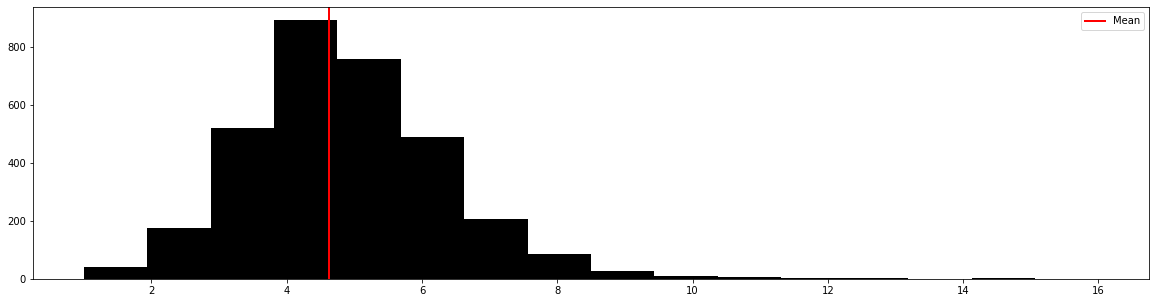

In [11]:
plt.figure(figsize = (20,5))
plt.hist(data_arc.groupby("key")["key"].count(),bins = 16,color = "black")
plt.axvline(np.nanmean(data_arc.groupby("key")["key"].count()), color = "red", linewidth = 2, label = "Mean")
plt.legend(loc='best')
plt.show()

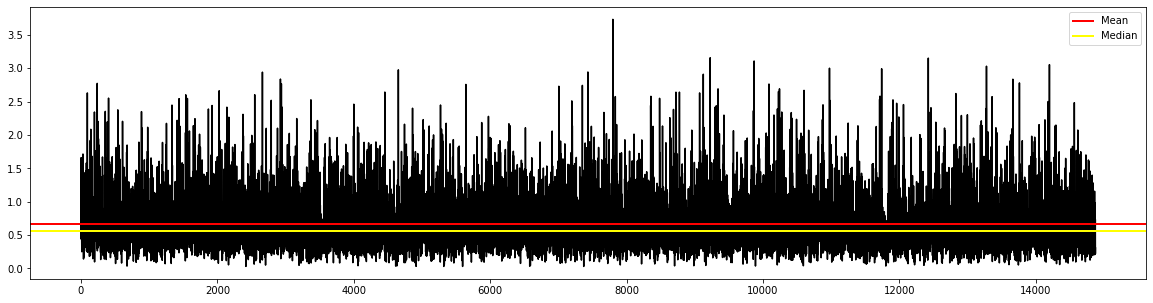

In [12]:
plt.figure(figsize = (20,5))
plt.plot(data_arc["aktivnaya_moshnost"],color = "black")
plt.axhline(y=np.nanmean(data_arc["aktivnaya_moshnost"]), color = "red", linewidth = 2, label = "Mean")
plt.axhline(y=np.nanmedian(data_arc["aktivnaya_moshnost"]), color = "yellow", linewidth = 2, label = "Median")
plt.legend(loc='best')
plt.show()

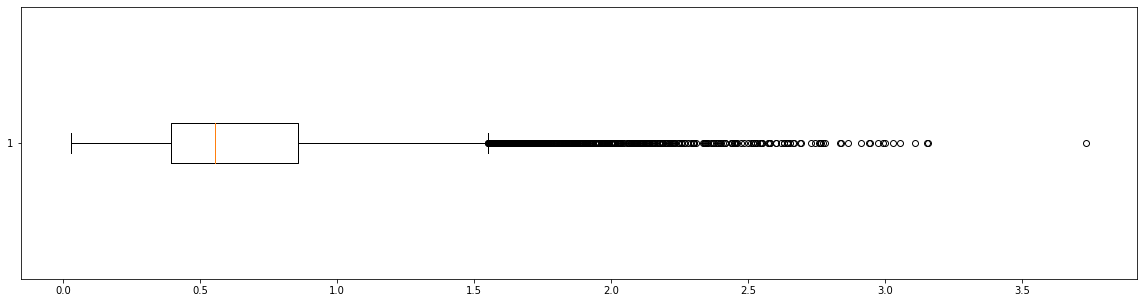

In [13]:
plt.figure(figsize = (20,5))
plt.boxplot(data_arc["aktivnaya_moshnost"],vert = False)
plt.show()

In [14]:
mean_median_std(data_arc["aktivnaya_moshnost"])

Среднее значение: 0.67
Медианное значение: 0.56
Стандартное отклонение 0.41
Распределение данных имеет положительную асимметрию


In [15]:
print("Кол-во анамольных значений:",len(outliers(data_arc["aktivnaya_moshnost"])))

Кол-во анамольных значений: 569


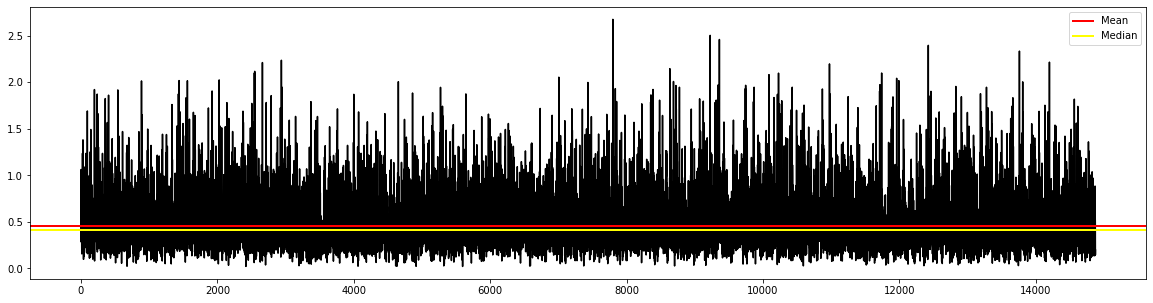

In [16]:
plt.figure(figsize = (20,5))
plt.plot(data_arc["reaktivnaya_moshnost"][data_arc["reaktivnaya_moshnost"]>0],color = "black")
plt.axhline(y=np.nanmean(data_arc["reaktivnaya_moshnost"]), color = "red", linewidth = 2, label = "Mean")
plt.axhline(y=np.nanmedian(data_arc["reaktivnaya_moshnost"]), color = "yellow", linewidth = 2, label = "Median")
plt.legend(loc='best')
plt.show()

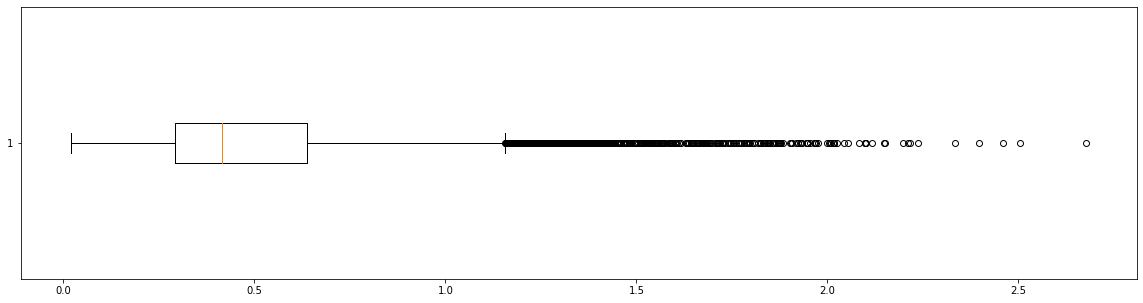

In [17]:
plt.figure(figsize = (20,5))
plt.boxplot(data_arc["reaktivnaya_moshnost"][data_arc["reaktivnaya_moshnost"]>0],vert = False)
plt.show()

In [18]:
mean_median_std(data_arc["reaktivnaya_moshnost"])

Среднее значение: 0.45
Медианное значение: 0.42
Стандартное отклонение 5.88
Распределение данных имеет положительную асимметрию


In [19]:
print("Кол-во аномальных значений:",len(outliers(data_arc["reaktivnaya_moshnost"])))

Кол-во аномальных значений: 601


In [20]:
print(data_arc["reaktivnaya_moshnost"].corr(data_arc["aktivnaya_moshnost"]))

0.05443724339693741


**Вывод:**

- Пропуски и дубликатов отсутствуют;
- Присутствуют аномальные значения в реактивной мощности;
- Данные о времени нагрева не в формате datetime;
- В среднем, партии нагревались по 4 раза;
- В данных присутствуют аномалии;
- Требуется дополнительное изучения разницы в активной и реактивной мощности. Есть возможность вывести новые признаки;
- Распределение активной и реактивной мощности имеет положительную асимметрию;
- Корреляция между активной и реактивной мощности равна 0.05, что говорит о плохой корреляции. 

**Данные о подаче сыпучих материалов (объём)**

In [21]:
data_bulk = read_data("data_bulk.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Кол-во дупликатов: 0
Кол-во пропусков:


key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

Соотношение ключей: 1.0


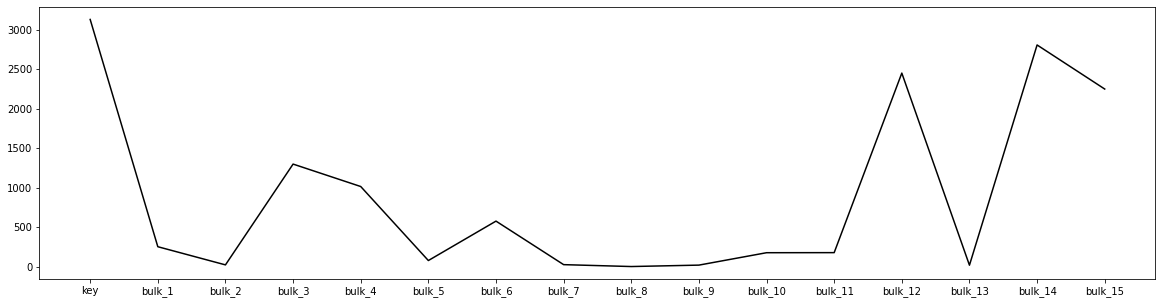

In [22]:
plt.figure(figsize = (20,5))
plt.plot(len(data_bulk["key"]) - data_bulk.isna().sum(),color = "black")
plt.show()

**Вывод:**

- Дубликаты отсутствуют;
- Больше всего используется смесь 11, 13 и 15;
- Меньше всего используется смесь 8 и 9;
- Присутствует большое количество пропусков, но они означают, что данные смеси не используются.

**Данные о подаче сыпучих материалов (время)**

In [23]:
data_bulk_time = read_data("data_bulk_time.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   bulk_1   252 non-null    object
 2   bulk_2   22 non-null     object
 3   bulk_3   1298 non-null   object
 4   bulk_4   1014 non-null   object
 5   bulk_5   77 non-null     object
 6   bulk_6   576 non-null    object
 7   bulk_7   25 non-null     object
 8   bulk_8   1 non-null      object
 9   bulk_9   19 non-null     object
 10  bulk_10  176 non-null    object
 11  bulk_11  177 non-null    object
 12  bulk_12  2450 non-null   object
 13  bulk_13  18 non-null     object
 14  bulk_14  2806 non-null   object
 15  bulk_15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:51:58,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:39:41,NaN,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-01 03:12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 02:41:27,2019-09-01 02:41:27
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 04:05:34,2019-09-01 04:05:34


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


Кол-во дупликатов: 0
Кол-во пропусков:


key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

Соотношение ключей: 1.0


**Вывод:**

- Дубликаты отсутствуют;
- Данные не имеют корректный тип данных;
- Данные аналогичны с "Данные о подаче сыпучих материалов (объём)" так как имеют прямую взаимосвязь;
- Данные не имеют важной информации, поэтому не войдут в таблицу признаков.

**Данные о продувке сплава газом**

In [24]:
data_gas = read_data("data_gas.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gaz_    3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,gaz_
0,1,29.749986
1,2,12.555561
2,3,28.554793
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959


,key,gaz_
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Кол-во дупликатов: 0
Кол-во пропусков:


key     0
gaz_    0
dtype: int64

Соотношение ключей: 1.0


In [25]:
print("Кол-во аномальных значений:",len(outliers(data_gas["gaz_"])))

Кол-во аномальных значений: 126


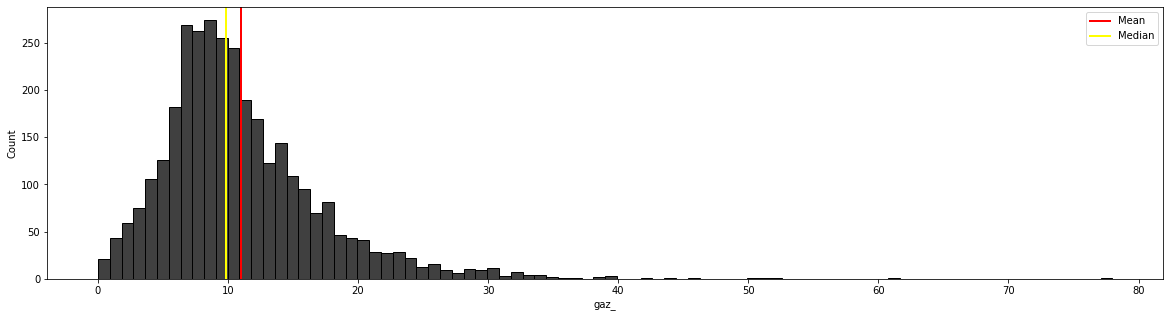

In [26]:
plt.figure(figsize = (20,5))
sns.histplot(data_gas["gaz_"],color = "black")
plt.axvline(np.nanmean(data_gas["gaz_"]), color = "red", linewidth = 2, label = "Mean")
plt.axvline(np.nanmedian(data_gas["gaz_"]), color = "yellow", linewidth = 2, label = "Median")
plt.legend(loc='best')
plt.show()

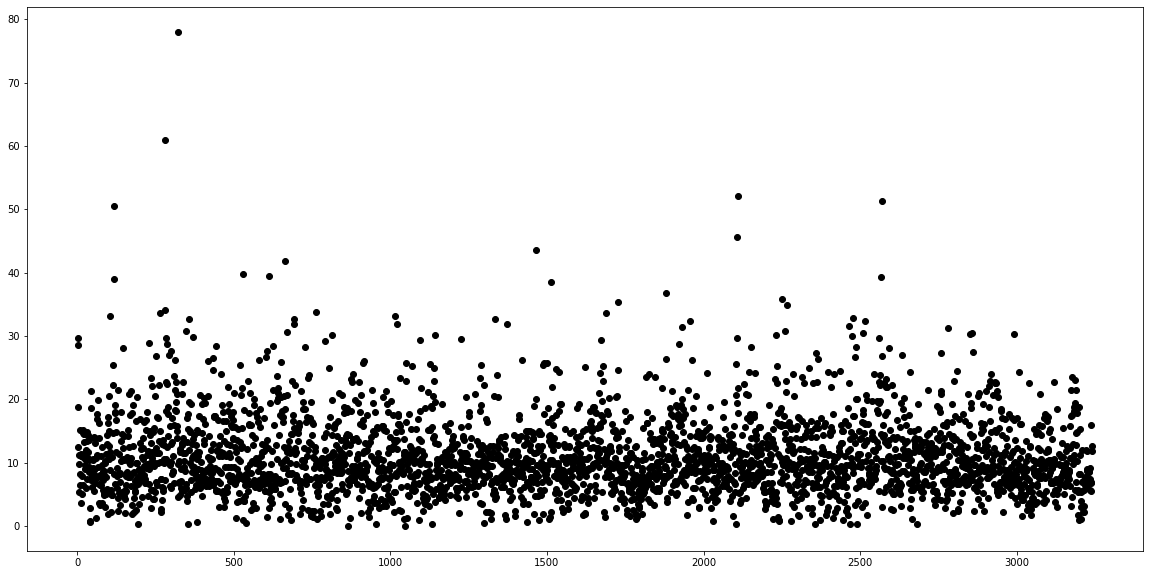

In [27]:
plt.figure(figsize = (20,10))
plt.scatter(data_gas["key"], data_gas["gaz_"],color = "black")
plt.show()

In [28]:
mean_median_std(data_gas["gaz_"])

Среднее значение: 11.0
Медианное значение: 9.84
Стандартное отклонение 6.22
Распределение данных имеет положительную асимметрию


**Вывод:**

- Дубликаты и пропуски отсутствуют;
- Распределение имеет положительную асимметрию;
- В данных присутствуют 126 анамалии. 

**Результаты измерения температуры**

In [29]:
data_temp = read_data("data_temp.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            15907 non-null  int64  
 1   vremya_zamera  15907 non-null  object 
 2   temperatura    13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

,key,vremya_zamera,temperatura
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN
15906,3241,2019-09-01 04:38:08,NaN


,key,temperatura
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


Кол-во дупликатов: 0
Кол-во пропусков:


key                 0
vremya_zamera       0
temperatura      2901
dtype: int64

Соотношение ключей: 4.95


По соотношению ключей видно, что кол-во циклов отличается для каждой партии. 
Посмотрим распрастраненность:

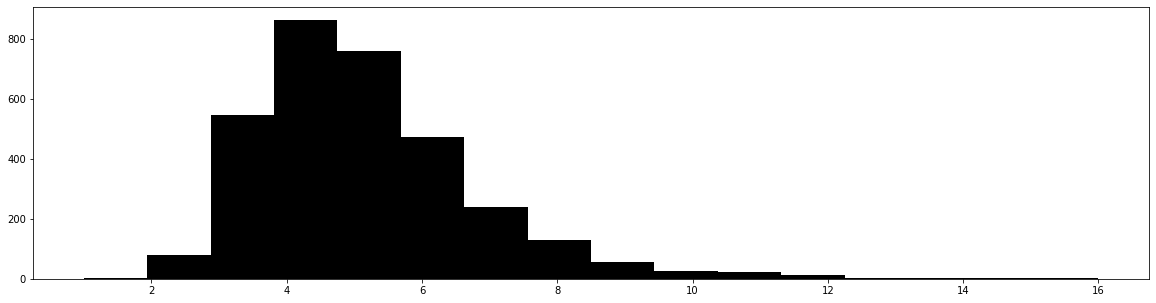

In [30]:
plt.figure(figsize = (20,5))
plt.hist(data_temp.groupby("key")["key"].count(),bins = 16,color = "black")
plt.show()

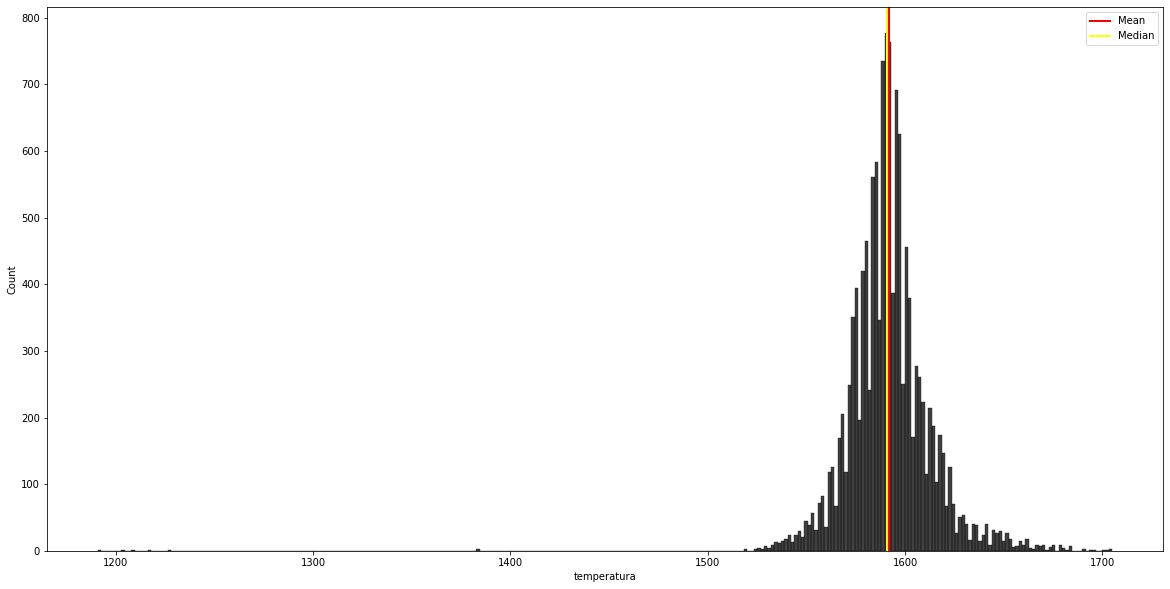

In [31]:
plt.figure(figsize = (20,10))
sns.histplot(data_temp["temperatura"],color = "black")
plt.axvline(np.nanmean(data_temp["temperatura"]), color = "red", linewidth = 2, label = "Mean")
plt.axvline(np.nanmedian(data_temp["temperatura"]), color = "yellow", linewidth = 2, label = "Median")
plt.legend(loc='best')
plt.show()

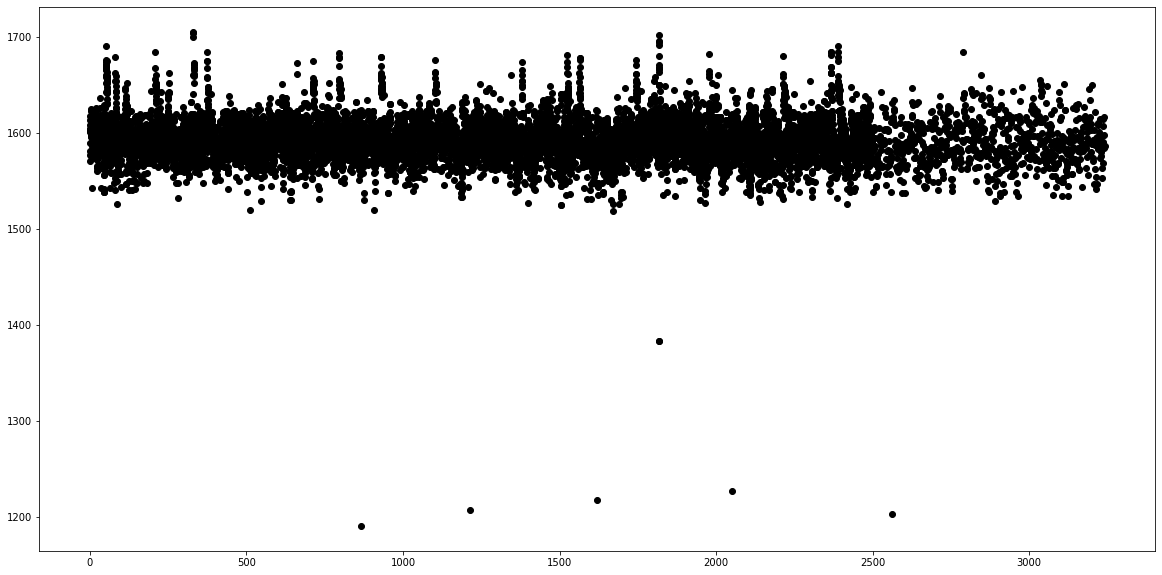

In [32]:
plt.figure(figsize = (20,10))
plt.scatter(data_temp["key"], data_temp["temperatura"],color = "black")
plt.show()

**Вывод:**

- Дубликаты отсутствуют;
- Требуется дополнительная проработка данных, для формирования первого и последнего замера температуры;
- В данных присутствуют пропуски. Есть пропуски присутствуют в первичном или последнем замере, то вся группа данных требует удаления;
- У данных по времени некорректный тип данных;
- По информации комбината, данные с температурой меньше 1500 являются выбросами, следственно в данных присутствуют выбросы и требуют удаления;
- Промежуточные замеры температуры требуют удаления, так как это прямые указатели на целевой признак.

**Данные о проволочных материалах (объём)**

In [33]:
data_wire = read_data("data_wire.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,63.117595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Кол-во дупликатов: 0
Кол-во пропусков:


key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

Соотношение ключей: 1.0


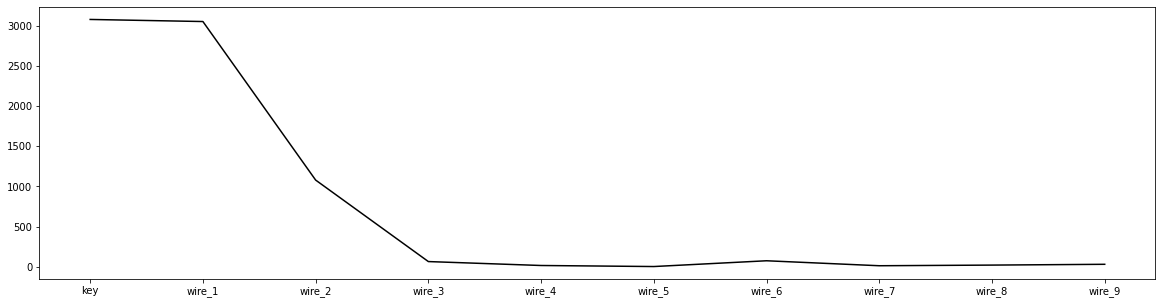

In [34]:
plt.figure(figsize = (20,5))
plt.plot(len(data_wire["key"]) - data_wire.isna().sum(),color = "black")
plt.show()

**Вывод:**

- Дубликаты отсутствуют;
- Больше всего используется проволочный материал 1;
- Меньше всего используется проволочный материал 5;
- Присутствует большое количество пропусков, но они означают, что данные проволочный материалы не используются.

**Данные о проволочных материалах (время)**

In [35]:
data_wite_time = read_data("data_wire_time.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3055 non-null   object
 2   wire_2  1079 non-null   object
 3   wire_3  63 non-null     object
 4   wire_4  14 non-null     object
 5   wire_5  1 non-null      object
 6   wire_6  73 non-null     object
 7   wire_7  11 non-null     object
 8   wire_8  19 non-null     object
 9   wire_9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,2019-09-01 04:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Кол-во дупликатов: 0
Кол-во пропусков:


key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

Соотношение ключей: 1.0


**Вывод:**

- Дубликаты отсутствуют;
- Данные не имеют корректный тип данных;
- Данные аналогичны с "Данные о проволочных материалах (объём)" так как имеют прямую взаимосвязь;
- Данные не имеют важной информации, поэтому не войдут в таблицу признаков.